In [20]:
# Original File name: linearfit_errors.ipynb
# suggested  Mods by Garith Smith April 2023
# Fitting a line to data with errors
# Analytically find the best fitting parameters of a linear fit to the data through the method of ordinary least squares estimation. (i.e. find m and b for y = m*x + b)
# Based on:
# https://github.com/anazalea/phys2300stuff/tree/master/climateData
# https://github.com/anazalea/phys2300stuff/blob/master/climateData/climateChange.ipynb

# Hooke's Law III (Jan 21)
Student: Liam Murray (87357539) \
Partner: Aaliyah Verhoef \
Apparatus number: Phys107 - (22 mass, 3 scale)

**Purpose:** This notebook will read a .csv file (comma-separated variables), and plot the data.
It will then use  ***iterative fitting*** to find the best fit of a specified function to the data.
It will provide a $\chi^2$ value  and a residuals plot to help diagnose the goodness-of-fit.

**How to use:** Duplicate this notebook, or copy and paste the relevant code cells into a new notebook. Remove the "explanation" markdown cells, and replace them with your own markdown cells for your lab report. Make sure you understand what the python code is doing at each step.

## Setup and Data Entry:

First, import numpy (standard scientific/numerical python library) and matplotlib (standard plotting python library).

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

%matplotlib inline

Now lets import our data from a .csv file (comma-separated variables). Some tips:
- Change the name of the *datafile* so it points to the .csv file with your data.
- Make sure that the .csv file is in the same folder as this notebook, or that you specify the absolute path.
- If you have a header line in your .csv file, make sure it has a # in front of it.

In [22]:
#Identifying and reading the data
datafile = "Lab 3 Data refactored.csv" 
data = np.genfromtxt(datafile, delimiter=",", dtype=float)

Lets create a vector of values (a.k.a. a 1-dimensional numpy array) for each column of the .csv file. These vectors let us do calculations on every data point at once, similar to applying an excel formula to every value in a column.

In [23]:
#Making Vectors from the data
mass = data[:, 0]  # M vector
time = data[:, 1]  # t vector
cycles = data[:, 2]  # c vector
# Calculate Period and uncertainty
# dt = 0.03 # Gaussian uncertainty of +/- 0.5 second#

df=pd.read_csv('Lab 3 Data refactored.csv', usecols=[0, 1])

# Print the data frame
# print(df)

std = df.groupby('#mass')["time"].std()
dt = np.mean(std) # Time uncertainty based on mean of standard deviation

T = time/cycles
dT = dt/(cycles * np.sqrt(2))


## Plotting:

In this case, we will simply use the columns of the .csv file, but in the future you can do some pre-processing calculations at this stage.

Let's add the axis labels, plot title, and the lower and upper limits for the plot axes.

In [24]:
# Creating variables for x and y data
x_var = mass
y_var = T*T
y_uncertainty = 2* T * dT
print(y_uncertainty)

# Preparing the Plots
x_label = "Mass [Kg]"
y_label = "(Period of oscillation)$^2$ [sec $^2$ ]"
title = "Exploration of Hooke's Law"
xmin = np.min(x_var)
xmax = np.max(x_var)
ymin = np.min(y_var)
ymax = np.max(y_var)

[0.00118403 0.00118308 0.0011869  0.00172697 0.00173019 0.00173234
 0.00162918 0.0016324  0.00163777 0.00105889 0.00105555 0.00105937
 0.00153676 0.00153461 0.00153246 0.00141854 0.00141962 0.00141532
 0.00090653 0.00090749 0.00090749 0.00130356 0.00129926 0.00130785]


Now lets make a graph of y_var vs. x_var, with error bars on the y data.

In [25]:
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
#plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# To save the plot as a .png, uncomment this:
#plt.savefig("plot", bbox_inches="tight", dpi=300)  # Saves the figure

Text(0.5, 1.0, "Exploration of Hooke's Law")

## Iterative Fitting:

This section fits the data with a specified model.
You can choose any function to be your model; the currently set function is a linear function.
The iterative fitting algorithm repeatedly guesses the fit parameters, using the method of gradient descent to improve on the previous guess until it converges to a satisfactory fit. 

This block defines the mathematical function which will be used to fit the data. Here it is set to a linear function where the parameter $a$ is the slope and $b$ is the y-intercept. The values of the parameters are not set; the fitter will find the values for these parameters which best fit the data.

In [26]:
def FitFunction(x, a, b):
    y = a*x + b
    return y

n_parameters = 2

Before we use this function to fit our data, we need to set up the fitting routine. We can optionally provide the following pieces of information to help out the fitter:

- A list of lower and upper bounds for the parameters
- A list of initial guesses for the parameters.

Currently the parameter lower bounds and upper bounds (param_bounds) are set to -/+ infinity (np.inf), and the guesses (initial_param) are both set to 1. (You can set each bound and parameter manually; for example for three parameters: initial_guesses = (100, 5, 3).)

In [27]:
#Parameter Bounds ([lower bounds,...],[Upper bounds,...])
param_bounds=([-np.inf,-np.inf],[np.inf,np.inf])  
initial_param=(1,1)  

Now we tell python to try to fit our function to the data, and also calculate errors on each parameter.

In [28]:
optimized_parameters, covariance_matrix = curve_fit(FitFunction, x_var,y_var,
                                                    sigma=y_uncertainty,absolute_sigma=True,
                                                    bounds=param_bounds,p0=initial_param)
parameter_errors = np.sqrt(np.diag(covariance_matrix))

Finally we print out the best fit parameters and their errors.

In [29]:
for i in range(len(optimized_parameters)):
    print(f'Parameter #{i+1}: {optimized_parameters[i]:.6e} ± {parameter_errors[i]:.1e}')

Parameter #1: 7.058801e+00 ± 1.7e-02
Parameter #2: 1.362946e-02 ± 1.2e-03


## Plotting the fit results:

To display the best fit function, we start by defining a range of x values for which to plot the function. We then create an array of 200 points within this x range. For each point, we use the best fit parameters from the previous section to calculate the y value of the function at that point.

In [30]:
# First calculate a reasonable range of x values for the best fit line
x_length = max(x_var) - min(x_var)
x_min_l = min(x_var) - 0.05*x_length
x_max_l = max(x_var) + 0.05*x_length
# Create an array of 200 linearly-spaced points
xForLine = np.linspace(x_min_l,x_max_l,200)
# Calculate the y values of the best fit line
yForLine = FitFunction(xForLine,*optimized_parameters)

Now we are ready to plot the fit function with our data. We repeat the code to plot the previous graph, and then plot our fit function.

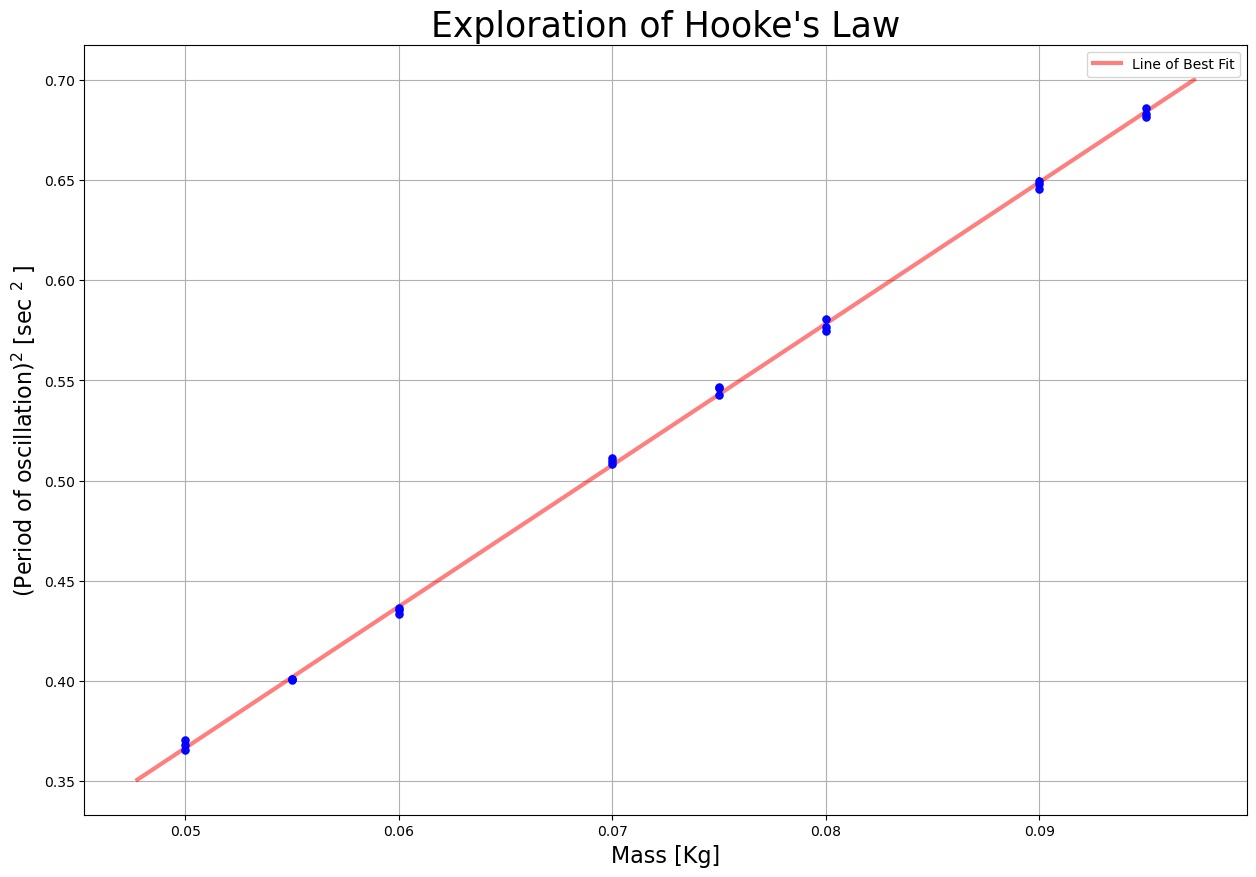

In [31]:
# Plot our data
plt.errorbar(x_var, y_var, yerr=y_uncertainty, fmt="o", ms=5, color="blue", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel(y_label, fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# To manually change the axis limits, uncomment (remove the # at the start) these lines:
#plt.ylim(ymin, ymax)  # This sets the range of the y-axis
#plt.xlim(xmin, xmax)  # This sets the range of the x-axis

# Add the line to the plot
plt.plot(xForLine, yForLine, lw=3, color="red", alpha=0.5, label="Line of Best Fit")

# Add a legend
plt.legend()

plt.show()

# To save the plot as a .png, uncomment this:
#plt.savefig("plot_fit", bbox_inches="tight", dpi=300)  # Saves the figure

## Diagnosing the goodness-of-fit:

Now lets calculate the residual for each data point, i.e. the difference between the data and the fit function.

In [32]:
residual = y_var - FitFunction(x_var,*optimized_parameters)

Lets plot the residuals graph. Recall that the residuals should be evenly distributed around zero, and there should be no visible trend or pattern in the residuals. Approximately 68% of the error bars should cross zero, and 95% of data points should be within two error bars of zero.

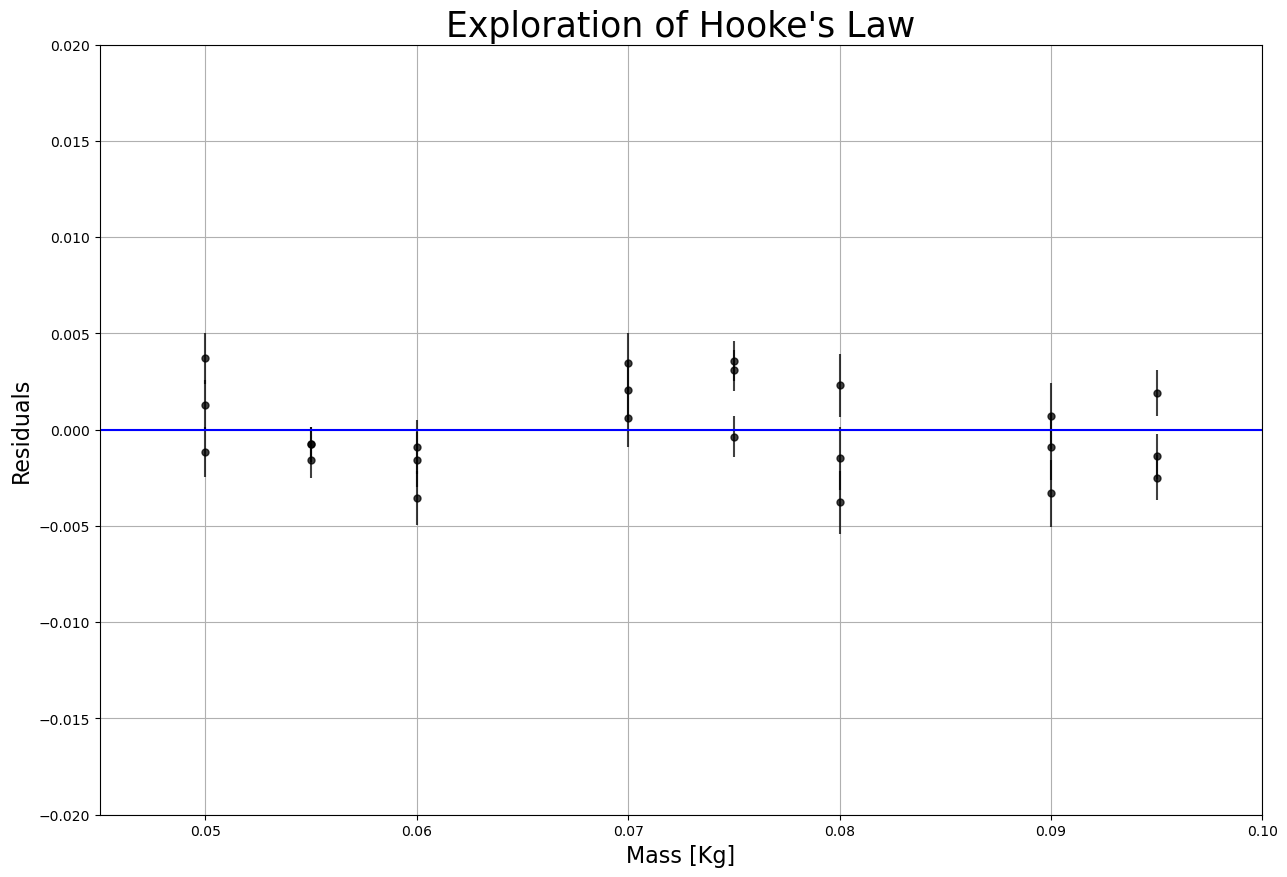

In [33]:
# Plot the residuals
plt.errorbar(x_var, residual, yerr=y_uncertainty, fmt="o", ms=5, color="black", alpha=0.75)

# Add grid lines, titles, and axis labels.
plt.gcf().set_size_inches(15, 10)  # This sets the size of the plot
plt.grid(True)  # This toggles whether gridlines are displayed
plt.xlabel(x_label, fontsize=16)  # x-axis label
plt.ylabel("Residuals", fontsize=16)  # y-axis label
plt.title(title, fontsize=25)  # Plot title

# The axis limits 
ymin_r=-0.02
ymax_r=0.02
plt.ylim(ymin_r, ymax_r)  # This sets the range of the y-axis
plt.xlim(xmin - (xmin * 0.1), xmax + (xmin * 0.1))  # This sets the range of the x-axis

plt.axhline(y = 0, color = 'b', linestyle = '-') 

plt.show()
# To save the plot as a .png, uncomment this:
#plt.savefig("plot_residuals", bbox_inches="tight", dpi=300)  # Saves the figure

Lets also calculate the $\chi^2$ value for our fit. This indicates the goodness-of-fit:
- $\chi^2>>1$ indicates the model is not a good fit to the data, or uncertainties are likely underestimated.
- $\chi^2\sim1$ indicates the model is a good fit to the data.
- $\chi^2<<1$ indicates the model is "too good" a fit, i.e. the uncertainties are likely overestimated.

In [34]:
ndof = len(x_var) - len(optimized_parameters) - 1 # Number of degrees of freedom ndof = no. entries - no. parameters -1
ru = residual / y_uncertainty
chisq = np.sum(np.power(ru, 2)) / ndof
print("Chisq", str.format("{0:.4f}", chisq))  # Print 4 significant figures

Chisq 3.3254


In [35]:
# Calculate K = g/s
k = (4 * np.pi**2) / optimized_parameters[0]

uk = (4 * np.pi**2 * parameter_errors[0])/(optimized_parameters[0]**2)

print("Spring Constant    k=", str.format("{0:.6f}", k))
print("K uncertainty   u[k]=", str.format("{0:.6f}", uk))
print("Relative uncertainty in K:", str.format("{0:.6f}", uk/k * 100), "%")

print(k, uk)



Spring Constant    k= 5.592794
K uncertainty   u[k]= 0.013225
Relative uncertainty in K: 0.236468 %
5.592793537060904 0.013225171309517668


In [36]:
# Use this cell for your quantitative comparison between your periods at 10° and 20°
A = 5.632213477010396
B = 5.391639344256999
dA = 0.11147769185641461
dB = 0.012413075526809298
tprime = (np.abs(A - B))/(np.sqrt((dA)**2 + (dB)**2))

print("T' = ", tprime)

T' =  2.144791749351122


**<font color="005477"><h1>Summary of all results:</h1></font>**

Across the two labs, our results are consistent in that:

- We calculated our Spring Constant to be $5.392 \pm 0.012$ [N/m]
- We found the slope of our collected data to be $1.8193 \pm 0.0042$ [mm/g] with an intercept of $-4.38 \pm 0.26$ [mm], and we can represent our data with the linear equation $|\vec{x}| = 1.819298 \cdot M -4.377193$ [mm/g].
- Our relative uncertainty of slope was calcalculated to be $\frac{u[m]}{m} = 0.002302$, which we can compare with our Chi Squared of $\chi^2 = 0.6996$. When we approach these numbers holistically, our data results in a good fit with the model and well estimated uncertainties.
    - We remain the position that 1mm is an accaptable span in either direction for uncertainty.

In summary, we accomplished part of our experimental goal to:
>Determine and compare the spring constant of a spring using two different experimental approaches based on Hooke’s Law (measuring stretch as a function of applied force and the oscillation period of a mass-on-a-spring system). You will design and carry out experiments to make high-quality experimental determinations of the spring constant using the stretch (Experiment 1) and oscillation (Experiment 2) approaches, as well as evaluating the underlying models.

We designed and carried our a series of high-quality experiments to determine the spring constant using the stretch produced by applying a mass. We also evaluated the linear model used to fit our data, in which we found a clear correlation between the model and our collected data which was supported by our $\chi^2$ of $0.6996$ and a visually good fit which indicates an appropriate "goodness-of-fit".


|                                                        | Lab 1 Results with Iterative Fitting | Lab 2 Results with Iterative Fitting | Lab 3 Results | Units |
|--------------------------------------------------------|--------------------------------------|--------------------------------------|---------------|-------|
| Spring Constant (k)                                    | $ 5.392   \pm   0.012 $              | $ 5.63   \pm   0.11 $                |               | [N/m] |
| Relative Uncertainty                                   | $ \frac {u[k]}{k} =  0.23 \% $       | $ \frac{u[k]}{k} =  1.98 \% $         |               |       |
| Chi Squared                                            | $ \chi^2  =  0.6996 $                | $\chi^2  =  0.1449 $                 |               |       |
| T' between Iterative and Non-iterative fitting results | $T' =  3.016 \cdot 10^{-10}$         | $T' =  1.165 \cdot 10^{-7}$          |               |       |

## Lab 3 Data collection and experimental improvement

#### Our plan for improvement:
We plan to improve our procedure from lab 2, by:
- Increasing the number of oscillations in each trial.
    - The impact of increasing $M$ will minimize $u[T]$ by increasing the devisor $M\sqrt{N}$.
- Measure across a greater range of masses, this will result in a more robust data set to fit our model to.
- Reevaluate our uncertainty in measurement time, as the velocity of the spring is not constant, which changes human reaction speeds.
    - Our time uncertainty will be established by recording an additional measurement, then using the Numpy .std function.
    - We will not record measurements with a mass below 50g, as the spring does not follow simple harmonic motion and risks the validity of our measurements.

In [37]:
# Use this cell for your quantitative comparison between your periods at 10° and 20°
A = 5.592793559731603# Old dt
B = 5.592793537060904  # New dt
dA = 0.05438728513600879
dB = 0.013225171309517668
tprime = (np.abs(A - B))/(np.sqrt((dA)**2 + (dB)**2))

print("T' = ", tprime)

T' =  4.050353215860527e-07


#### Results of Lab 1 - 3 Improvements and Trends
Following the implementation of our plan for improvement, we observed the following results:

|                                                        | Lab 1 with Results Iterative Fitting | Lab 2 Results with Iterative Fitting | Lab 3 Results                                                               | Units |
|--------------------------------------------------------|--------------------------------------|--------------------------------------|-----------------------------------------------------------------------------|-------|
| Spring Constant (k)                                    | $ 5.392   \pm   0.012 $              | $ 5.63   \pm   0.11 $                | $5.592 \pm 0.027$                                                           | [N/m] |
| Relative Uncertainty                                   | $ \frac {u[k]}{k} =  0.23 \% $       | $ \frac{u[k]}{k} =  2.0 \% $         | $ \frac{u[k]}{k} =  0.24  \%  $                                             |       |
| Chi Squared                                            | $ \chi^2  =  0.6996 $                | $\chi^2  =  0.1449 $                 | $\chi^2 = 3.3254$                                                           |       |
| T' between Iterative and Non-iterative fitting results | $T' =  3.016 \cdot 10^{-10}$         | $T' =  1.165 \cdot 10^{-7}$          | Calculation between old and new dT values. </br>  $T' = 4.05 \cdot 10^{-7}$     |       |

In summary, we accomplished part of our experimental goal to:
>Determine and compare the spring constant of a spring using two different experimental approaches based on Hooke’s Law (measuring stretch as a function of applied force and the oscillation period of a mass-on-a-spring system). You will design and carry out experiments to make high-quality experimental determinations of the spring constant using the stretch (Experiment 1) and oscillation (Experiment 2) approaches, as well as evaluating the underlying models.

We designed and carried our a series of high-quality experiments to determine the spring constant using the stretch produced by applying a mass. We also evaluated the linear model used to fit our data, in which we found a clear correlation between the model and our collected data which was supported by our $\chi^2$ ranging from $0.6996$ to $3.3254$ which indicates an appropriate "goodness-of-fit", which was reflected by the graph visually fitting well.

When compared to other groups, our Spring constants are reletively close, with Mia and Alexis reporting $k = 6.46 \pm 0.29$ with a low relative uncertainty.

**<font color="005477">To summarize our findings across all labs:</font>**
- We calculated our best Spring Constant to be $5.592 \pm 0.027$ [N/m]
- Our relative uncertainty of slope was calcalculated to be $\frac{u[m]}{m} = 0.24 \%$, which we can compare with our Chi Squared of $\chi^2 = 0.3.3254$. When we approach these numbers holistically, our data results in a good fit with the model and well estimated uncertainties.
    - These results indicate that we can confidently identify an approximate spring constant for our spring, and we can prove that Hooke's law can be modeled using a linear fit which follows our expectations.